<a href="https://colab.research.google.com/github/diegoestradaXO/Lab6-Data-Science/blob/master/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 6: Analítica de redes sociales
## Autores
- Saúl Contreras 18409
- Andrea Elías 17048
- Diego Estrada 18540

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import tweepy
import csv
import pandas as pd
import string
import re
import emoji

---
## Prueba del API de Twitter con llaves de perfil de desarrollador


In [11]:
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""
auth = tweepy.OAuthHandler('AkdjcfXtdiSRYaH0LWlunSy5r', 'XjmB5ZGTqCvT64pcgG4wAWMQ3UuLusL9dgck1AHFLk2yQp0Hbj')
auth.set_access_token('1384276708388347920-UCeP00NSbBklszHcZDKHJyhQYrbA65','hFdx01IzkhH5iCTZ3jLUfqiQGpIhWDTjhHiJrBN4pj4Bv' )

api = tweepy.API(auth, wait_on_rate_limit=True)
auth
public_tweets = api.home_timeline()
for tweet in public_tweets:
    print (tweet.text)


RT @RainbowGameJam: SIXTH YEAR IN THE BAG 🎉🎉🎉

It's been a pleasure as always to run #RainbowJam21 for you all.

We still have some submiss…
RT @LuckReserve: Tweet us your BEST Cold War clips for our first instalment of Luck's Top Plays!
IGDA Switzerland's Craft.Innovate.Connect webinar series continues tomorrow with an in-depth look at the point-and-… https://t.co/DABl6IiKBK
Am I the only one who likes talking when sleepy? Too bad I dont have anyone to talk to though
I-
I wanna do OOTD pics but my mirror isng good enough
RT @IndieGameTree: If you're a #gamedev or #indiedev leave a like or comment so I can follow your account and start sharing your creations!…
What does OOTD mean tbh-?
Everyone go tell maya she is sexy thank you and goodnight https://t.co/JpDUCOlcG1
RT @UnicrnSixx: I suck at valorant, but i'm doing it in style | #NorCalUnicrn
@LuckReserve @LuckUpdate_ 

https://t.co/EWFVz6vXfU
https://t…
RT @LeonitusKxng: The two teams that seem to be the most like a family are @Projec

- - -
## Descripción del problema
_Extraiga los datos relacionados con el coviden Guatemala, puede utilizar cualquier red social, a la que  se  tenga  acceso,  y  pueden  extraerse  datos  de  varias.  Por  ejemplo  si  extrae  datos  de  twitter podría utilizar el hashtag #COVID19gt o #CoronavirusGT. Explore los datos que extraiga y descubra conocimiento, tendencias y elementos interesantes._



### Extracción de datos

In [12]:
#Se crea el archivo csv, si ya existe, se escribe en él.
file = open('twitter_covid_gt.csv', 'a')

writer = csv.writer(file)
hashtags = ('#COVID19gt OR #CoronavirusGT OR #CuarentenaTotal OR #GuatemalaNoSeDetiene OR #Guatemala#COVID19 OR #CoronavirusGuatemala OR #QuedateEnCasaGT OR #COVID_19gt OR #Covid19gt OR #ToqueDeQuedaGT OR #PandemiaGT OR #DatosCovidGT OR #YoMeQuedoEnMiCasa OR #JuntosSaldremosAdelante')
for tweet in tweepy.Cursor(api.user_timeline,id='GuatemalaGob', lang="es").items():
    temporal = tweet.text
    #Limpieza de caracteres especiales
    temporal = temporal.replace('á', 'a')
    temporal = temporal.replace('é', 'e')
    temporal = temporal.replace('í', 'i')
    temporal = temporal.replace('ó', 'o')
    temporal = temporal.replace('ú', 'u')
    temporal = temporal.replace('Á', 'A')
    temporal = temporal.replace('É', 'E')
    temporal = temporal.replace('Í', 'I')
    temporal = temporal.replace('Ó', 'O')
    temporal = temporal.replace('Ú', 'U')
    temporal = temporal.replace('ñ', 'n')
    temporal = temporal.replace('Ñ', 'N')
    temporal = temporal.replace('Ü', 'U')
    temporal = temporal.replace('ü', 'u')
    writer.writerow([tweet.created_at, temporal.encode('utf-8')])

### Carga de datos

In [13]:
data = pd.read_csv('/content/twitter_covid_gt.csv')
data.columns = ["Date", "Tweet"]
len(data.columns)


2

### Limpieza y preprocesamiento

Se crean funciones para eliminar signos de puntuación, url's y números, pues no aportan valor al análisis que se quiere hacer.

In [14]:
def remove_characters(text):
  return text.translate(text.maketrans('', '', string.punctuation))

def remove_url(text):
    return re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

def remove_num(text):
    return re.sub('^\d+\s|\s\d+\s|\s\d+$','',text)

Insalación de librería emoji

In [15]:
!pip install emoji

In [16]:
# Se quitan vacíos
data = data.dropna(subset=['Tweet'])

# Lowercasing
data['Tweet'] = data['Tweet'].apply(lambda line: str(line).lower())

# Se quitan signos de puntuación
data['Tweet'] = data['Tweet'].apply(lambda line: remove_characters(str(line)))

# Se quitan enlaces URL
data['Tweet'] = data['Tweet'].apply(lambda line: remove_url(str(line)))

# Se quitan los emojis
data['Tweet'] = data['Tweet'].apply(lambda line: emoji.demojize(str(line)))

# Se quitan números
data['Tweet'] = data['Tweet'].apply(lambda line: remove_num(str(line)))

A continuación se elminan las stopwords

In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
stopwords = set(stopwords.words('spanish'))
expresiones = ['el','los','las','la','de','que','porque','de','por','lo','brt','object','deic',
               'bxc2xa1ojala','Name','bel','lenght','viern','dtype']
for i in expresiones:
    stopwords.add(i)
print(stopwords)

{'vuestra', 'un', 'estar', 'habrás', 'para', 'tenidas', 'él', 'serás', 'fuera', 'tanto', 'su', 'por', 'estuvisteis', 'fuerais', 'has', 'tenía', 'me', 'muy', 'tuyos', 'tuviésemos', 'eran', 'fuesen', 'la', 'fuésemos', 'al', 'fuiste', 'tened', 'estando', 'o', 'tuviéramos', 'esté', 'éramos', 'ellos', 'tuviste', 'sobre', 'habida', 'tuvieras', 'fueseis', 'esos', 'tendrás', 'habéis', 'tengamos', 'habíais', 'tendré', 'unos', 'sentida', 'tengáis', 'ya', 'todos', 'estados', 'habremos', 'vuestras', 'muchos', 'estaremos', 'algunos', 'estáis', 'tendréis', 'sois', 'hubiesen', 'hubiese', 'ese', 'hubiera', 'tuviesen', 'eras', 'estarías', 'sí', 'habías', 'habidos', 'suyas', 'tienes', 'nosotros', 'hayas', 'vuestros', 'nuestros', 'hasta', 'teníamos', 'vosotras', 'fueses', 'tuvieseis', 'estaréis', 'hubiste', 'tenéis', 'nada', 'estuve', 'hubieseis', 'habrán', 'habiendo', 'tuvierais', 'algunas', 'está', 'míos', 'uno', 'desde', 'estuvieron', 'mis', 'ti', 'lo', 'tuvimos', 'estén', 'serían', 'sea', 'sin', 'ten

Se observan los primeros 10 twits en el dataset y efectivamente han pasado por la limpieza y preprocesamiento. Los datos están listos para el análisis y aplicación de algoritmos.

In [19]:
data.head(10)

,Date,Tweet
0,2021-09-05 02:52:22,bendirecto presidente drgiammattei participa ...
1,2021-09-05 02:14:40,bendirecto presidente drgiammattei participa ...
2,2021-09-05 02:06:39,bendirecto vecinos de martires del pueblo son...
3,2021-09-05 01:49:46,bcontinua la jornada movil de vacunacion en el...
4,2021-09-05 01:07:39,brt scspgt presidente drgiammattei esta vacuna...
5,2021-09-05 00:34:46,bendirecto declaraciones del presidente drgia...
6,2021-09-05 00:10:14,bendirecto declaraciones del presidente drgia...
7,2021-09-04 23:23:35,bendirecto presidente drgiammattei supervisa ...
8,2021-09-04 18:01:38,bendirecto el plan de vacunacion contra el co...
9,2021-09-04 02:53:20,bendirecto vecinos de villa nueva son atendid...


### Análisis exploratorio

Con el fin de ver de manera más atractiva las palabras más frecuentes en el conjunto de datos, se realiza una nube de palabras. Se observa que las más frecuentes son: drgiammatei, presidente, participa, en directo, vacuna, jornada, en vivo, entre otras.

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

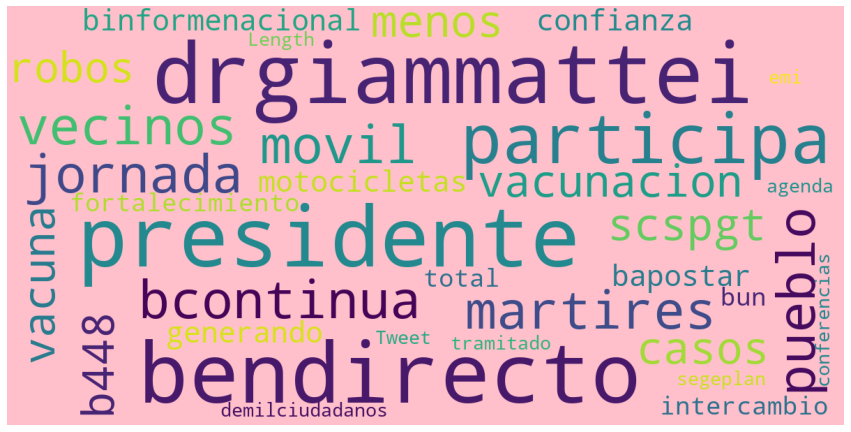

In [21]:
wordcloud = WordCloud(
        background_color='pink',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(str(data['Tweet']))
fig = plt.figure(1, figsize=(15, 15))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

También se utiliza la librería Counter para obtener la suma de las palabras más frecuentes en los twits del conjunto de datos.

In [22]:
from collections import Counter

In [23]:
tweet_count = Counter()

In [24]:
splitted_tweets = []
for tweet in data['Tweet']:
    word_list = []
    for word in tweet.split():
        if word not in stopwords:
            word_list.append(word)
    splitted_tweets.append(' '.join(word_list))

In [25]:
for tweet in splitted_tweets:
    tweet_count.update(word.strip('.,?!"').lower() for word in tweet.split())

Justo como se observó en la nube de palabras, *drgiammatei*, haciendo referencia al presidente de Guatamala, es la palabra más frecuente. Seguido de ella se encuentra *presidente, guatemala, endirecto, mas, gobierno, nacional y covid19*.

In [27]:
tweet_count.most_common(20)

[('drgiammattei', 559),
 ('presidente', 435),
 ('guatemala', 395),
 ('gobierno', 281),
 ('nacional', 250),
 ('benvivo', 247),
 ('mas', 221),
 ('bendirecto', 219),
 ('binformenacional', 190),
 ('covid19', 180),
 ('minecogt', 129),
 ('minsaludguate', 113),
 ('vacunacion', 104),
 ('informe', 104),
 ('hoy', 96),
 ('pais', 93),
 ('participa', 92),
 ('apoyo', 92),
 ('dia', 90),
 ('bla', 90)]

A continuación se realiza una gráfica de barras para verlo de otra forma.

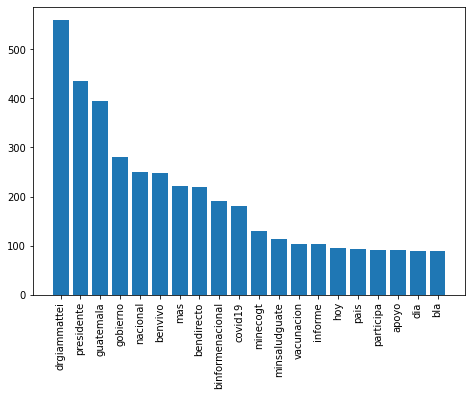

In [28]:
datos_tweet = tweet_count.most_common(20)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = [i[0] for i in datos_tweet]
y_axis = [i[1] for i in datos_tweet]
ax.bar(x_axis,y_axis)
plt.xticks(rotation=90)
plt.show()

Al realizar la grafica de barras con frecuencias de las plabras encontradas se logro determinar que el ministerio de economia es uno de los mas mencionados, por lo cual se puede inferir que esto es debido a las fluctuaciones economicas que el covid-19 ha causado en el pais.

##**Descubrimiento de información**

Basandonos en los hallazgos, se pudo observar que las palabras mas frecuentes dentro de los tweets son; Dr Giammatei, presidente, Guatemala, gobierno, nacional, en vivo, en directo, informe nacional, covid19, ministerio de economia, etc.<br>


Estas palabras al analizarlas, podemos darnos cuenta de que son aspectos importantes durante la problematica actual. En cuanto a "Dr. Giammatei" es logico que esta aparexca ya que es el presidente de Guatemala. Podemos inferir que los tweets mencionandolo son debido a las distintas restricciones y medidas que ha tenido que imponwe con respecto a la pandemia.<br>


Otro topico importante, el cual se ve reflejado dentro de las palabras mas frecuentes es informe nacional, en directo y en vivo, esto debido a los boletines informarivos que son realizados por el presidente en directo basado en los informes nacionales. Asociado a esto, podemos tambien mencionar las palabras; informe, gobierno, nacional.<br>


Por otro lado, las palabras minecogt y minsaludguate, las cuales hacen referencia al Ministerio de Economia y al Ministerio de Salud, son de las mas frecuentes, ya que el covid-19, tiene incidencias en ambos. El ministerio de salud debido que con la situación ellos han sido los más involucrados en el país en el manejo de la situación del COVID-19, debido que ellos son los que han mantenido a todos los enfermos en cuarentena y hecho la distribución de presupuesto, y esto ha traído comentarios tanto positivos como negativos, por lo cual son un tema lógico de ser mencionados en muchas ocasiones por las personas.<br>


